# Регрессия

In [1]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.simplefilter("ignore")

In [2]:
df_train = pd.read_csv('titnic_data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('titnic_data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Отбор данных и заполнение пропусков
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

X_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y_train = df_train['Survived']
                   
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=40)

----
# Линейная регрессия

Популярный алгоритм обучения регрессии, который строит модель, являющуюся линейной комбинацией признаков входного образца.

Сделаем модель f(x) являющуюся линейной комбинацией признаков образца x:

$$ f(x) = Xw+ε $$

- X - это матрица всех признаков размера [n, m+1], включая единичною колонку 
- w - вектор параметров модели (веса модели)
- ε - случайная переменная - ошибка модели

In [5]:
# Пример данных
X = np.array([[1, 3, 4, 2],
              [1, 4, 5, 3],
              [1, 4, 6, 7],
              [1, 5, 6, 9]])

w = np.array([4, 6, 1, 5])

ε = np.array([6, 7, 9, 3])

print(f'f(x) = Xw+ε = {X.dot(w.T) + ε}')

f(x) = Xw+ε = [42 55 78 88]


Задача - нахождение весов модели w\
Решение:
МНК - метод наименьших квадратов
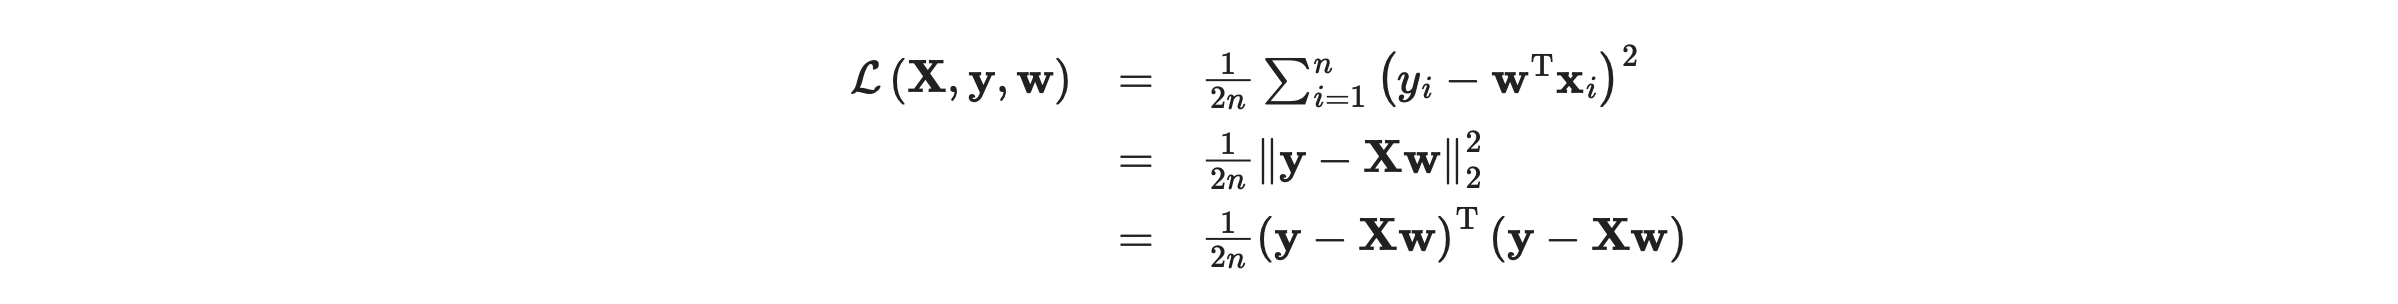

Для решения данной оптимизационной задачи необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно w
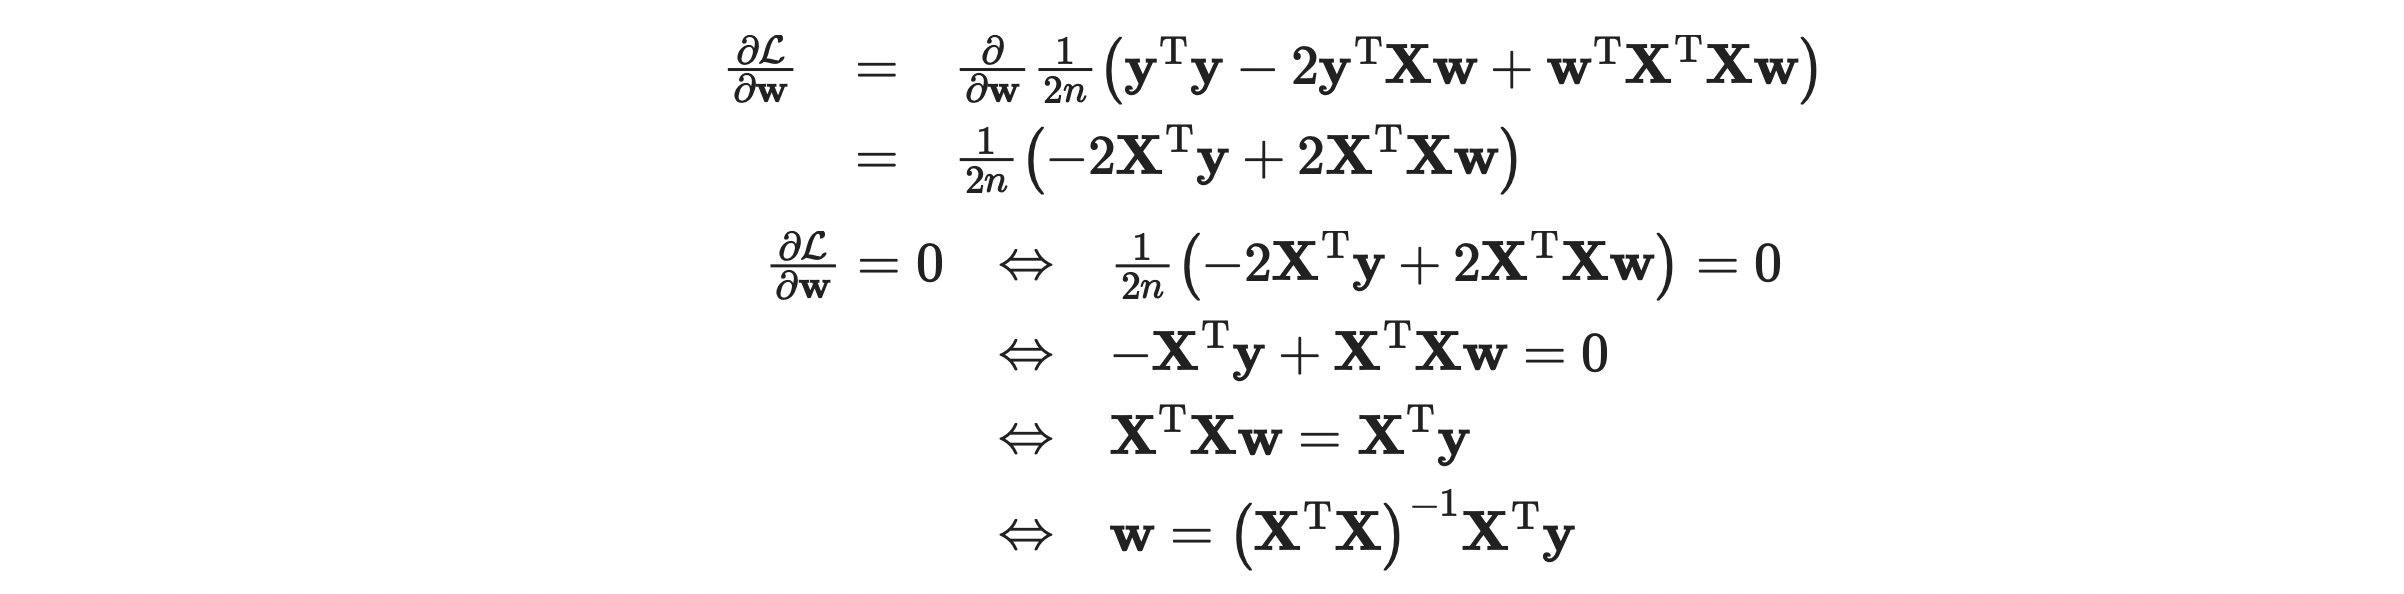

Проблема этого аналитического подхода решения в том, что теорема Гаусса-Маркова нарушается по нескольким пунктам и появляется проблема больших чисел в памяти

Теорема Гаусса-Маркова\
Предположения теоремы:
1) Предполагаем что зависимость линейна, но с некоторой ошибкой
$$ y = w^Tx + ε $$
2) $x_i$ и $y_i$ независимы\
3) Между столбцами матрицы X не должно быть линейной зависимости(без мультиколлениарностьи)\
4) Математическое ожидание при фиксированном x должно стремиться к нулю\
$E(ε|x)=0$\
5) Ошибка модели не зависит от $x_i$(гомоскедастичность)\
$D(ε|x)=const$\
Если условие не выполняется, то данные обладают свойством гетероскедастичности\

При выполнении всех условий теоремы(что часто почти невозможно в реальных условиях), МНК дает наиболее точный ответ


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# поробуем модель на наших данных
clf = LinearRegression()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.45605232068837576

In [8]:
# видно что результат сильно далек от желаемого
# можно попробовать применить модель к отдельным фичам
x_Pclass = x_train[['Pclass']]
y_fare = x_train[['Fare']]

clf = LinearRegression()
clf.fit(x_Pclass, y_fare)
clf.score(x_val[['Pclass']], x_val[['Fare']])

0.32653285925305986

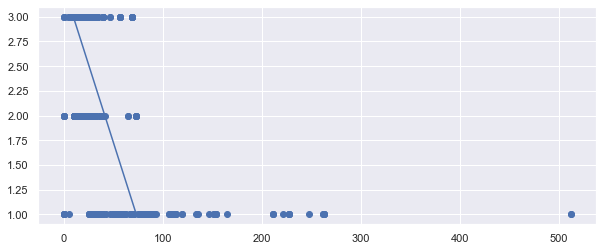

In [9]:
# вот так выглядят предсказания модели
plt.figure(figsize=(10, 4))
plt.scatter(y_fare, x_Pclass)
plt.plot(clf.predict(x_val[['Pclass']]), x_val[['Pclass']])
plt.show()

$ MSE -> min$

Проблема линейной модели в том что она может переобучаться, а также в частом несоблюдении теоремы Гаусса-Маркова. Для этого приминяется регуляризация - гиперпараметр, который может влиять на обучаемость модели и изменять её сложность, что напрямую сказывается на результате

Есть две основынх модели основанных на MSE с регуляризацией
1) Ridge\
$ MSE + λΣ{w_i}^2 -> min$\
Свойство: лучше борется с мультиколлениарностью\
2) LASSO\
$ MSE + λΣ|{w_i}| -> min$\
Свойство: зануляет часть весов => выбирает фичи\



In [13]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

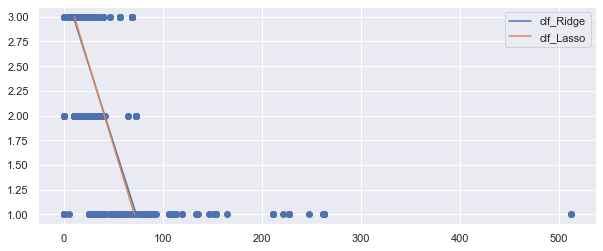

In [26]:
clf_Ridge = Ridge()
clf_Ridge.fit(x_Pclass, y_fare)

clf_Lasso = Lasso()
clf_Lasso.fit(x_Pclass, y_fare)

plt.figure(figsize=(10, 4))
plt.scatter(y_fare, x_Pclass)
plt.plot(clf_Ridge.predict(x_val[['Pclass']]), x_val[['Pclass']], label='clf_Ridge')
plt.plot(clf_Lasso.predict(x_val[['Pclass']]), x_val[['Pclass']], label='clf_Lasso')
plt.legend()
plt.show()

----

0.3831518130613345


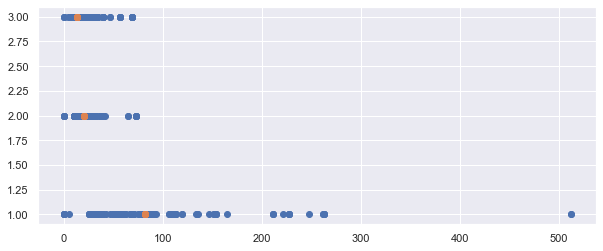

In [30]:
# Также есть регрессия основанная на дереве решений
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(x_Pclass, y_fare)
print(clf.score(x_val[['Pclass']], x_val[['Fare']]))
plt.figure(figsize=(10, 4))
plt.scatter(y_fare, x_Pclass)
plt.scatter(clf.predict(x_val[['Pclass']]), x_val[['Pclass']])
plt.show()

0.3829081086638074


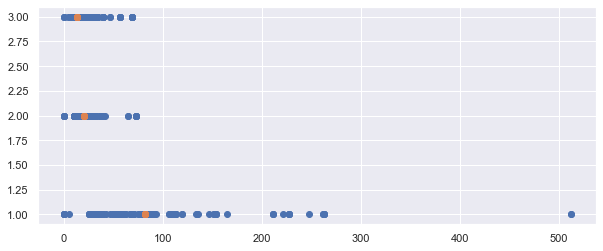

In [31]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(x_Pclass, y_fare)
print(clf.score(x_val[['Pclass']], x_val[['Fare']]))
plt.figure(figsize=(10, 4))
plt.scatter(y_fare, x_Pclass)
plt.scatter(clf.predict(x_val[['Pclass']]), x_val[['Pclass']])
plt.show()